# CAPSTONE TWO MODELING - HECTOR SANCHEZ

In [33]:
# Begin by importing necessary libraries for modeling

import pandas as pd  # for data manipulation and analysis
from sklearn.model_selection import train_test_split, cross_val_score # contains tools for model selection and evaluation
from sklearn.linear_model import LogisticRegression # contains linear models like Logistic Regression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # contains ensemble algorithms like Random Forest and Gradient Boosting
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # provides metrics to evaluate model performance
from sklearn.preprocessing import StandardScaler 

In [36]:
# Next, we will load the preprocessed data that we worked on in the previous preprocessing step
# We saved our preprocessed data as CSV files in the previous step

# Load features (X) and target (y) for training and testing sets

X_train = pd.read_csv('C:/Users/hecsa/Springboard/Springboard Github/Springboard/DataScienceCapstoneTwo/X_train_preprocessed.csv')
X_test = pd.read_csv('C:/Users/hecsa/Springboard/Springboard Github/Springboard/DataScienceCapstoneTwo/X_test_preprocessed.csv')
y_train = pd.read_csv('C:/Users/hecsa/Springboard/Springboard Github/Springboard/DataScienceCapstoneTwo/y_train_preprocessed.csv')
y_test = pd.read_csv('C:/Users/hecsa/Springboard/Springboard Github/Springboard/DataScienceCapstoneTwo/y_test_preprocessed.csv')

In [38]:
# If y_train and y_test are DataFrames, we need to convert them to Series

y_train = y_train.iloc[:, 0]  # Assuming the target variable is the first column
y_test = y_test.iloc[:, 0]

In [40]:
# Verify the data shape of the data by calling .shape on the training and test sets.
# This ensures that the data was loaded correctly
# We will also check the head of the datasets by calling .head()

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (815, 68)
X_test shape: (204, 68)
y_train shape: (815,)
y_test shape: (204,)


In [42]:
# Use .head() to print the first five rows of X_train

print("\nFirst five rows of X_train:")
print(X_train.head())


First five rows of X_train:
   Sexo_-2.1316282072803005e-16  Sexo_0.7828813612588126  \
0                          True                    False   
1                          True                    False   
2                          True                    False   
3                          True                    False   
4                          True                    False   

   Faixa_etaria_-1.0206207261596576  Faixa_etaria_0.0  \
0                             False             False   
1                             False             False   
2                             False             False   
3                             False             False   
4                             False             False   

   Faixa_etaria_3.1086244689504386e-17  Faixa_etaria_1.0206207261596576  \
0                                 True                            False   
1                                 True                            False   
2                                 True    

In [44]:
# Use .head() to print the first five rows of y_train

print("\nFirst five rows of y_train:")
print(y_train.head())


First five rows of y_train:
0    False
1    False
2    False
3    False
4    False
Name: Desfecho_final_3.0, dtype: bool


In [ ]:
# We are going to initialize and Train three Models:
# 1. Logistic Regression
# 2. Random Forest Classifier
# 3. Gradiant Boosting Classifier

In [46]:
# MODEL 1: LOGISTIC REGRESSION 
# This model is suitable for binary classification problems
# Setting max_iter=1000 ensures that the model converges

# Start by initializing the Logistic Regression model
# We set max_iter to a higher value to ensure convergence

log_model = LogisticRegression(max_iter=1000, random_state=42)

In [48]:
# Fit the model on the training data

log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [50]:
# MODEL 2: RANDOM FOREST CLASSIFIER
# This is an ensemble method that uses multiple decision trees
# Setting n_estimators=100 specifies the number of trees in the forest

# Similar to the last model, start by initializing the Random Forest model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [52]:
# Next, fit the model on the training data

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
# MODEL 3: GRADIENT BOOSTING CLASSIFIER
# This is an ensemble method that builds trees sequentially to correct errosrs made by previous trees
# n_estimators=100 specifies the number of boosting stages

# Initialize the Gradient Boosting model as in the last 2 models

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [56]:
# Now fit the model on the training data

gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Now that we've worked through our 3 models, we will Evaluate the models on the test set

In [58]:
# We will create a function to evaluate the performance of each model

def evaluate_model(model, X_test, y_test):
    """
    Evaluates the model's performance on the test set and returns evaluation metrics.
    """
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions) # the proportion of correct predictions over total predictions
    precision = precision_score(y_test, predictions, zero_division=0) # the ability of the classifier not to label a negative sample as positive
    recall = recall_score(y_test, predictions, zero_division=0) # the ability of the classifier to find all the positive samples
    f1 = f1_score(y_test, predictions, zero_division=0) # the mean of precision and recall
    return accuracy, precision, recall, f1

In [ ]:
# We will now use this function to individually evaluate each model

In [60]:
# Evaluate Logistic Regression model

log_accuracy, log_precision, log_recall, log_f1 = evaluate_model(log_model, X_test, y_test)

In [62]:
# Evaluate Random Forest model

rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(rf_model, X_test, y_test)

In [64]:
# Evaluate Gradient Boosting model

gb_accuracy, gb_precision, gb_recall, gb_f1 = evaluate_model(gb_model, X_test, y_test)

In [66]:
# Next, we need to display the results

print("\nModel Evaluation Metrics:")
print("--------------------------------------------------")
print("Logistic Regression:")
print(f"Accuracy: {log_accuracy:.4f}")
print(f"Precision: {log_precision:.4f}")
print(f"Recall: {log_recall:.4f}")
print(f"F1 Score: {log_f1:.4f}")
print("--------------------------------------------------")
print("Random Forest:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print("--------------------------------------------------")
print("Gradient Boosting:")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"Precision: {gb_precision:.4f}")
print(f"Recall: {gb_recall:.4f}")
print(f"F1 Score: {gb_f1:.4f}")
print("--------------------------------------------------")


Model Evaluation Metrics:
--------------------------------------------------
Logistic Regression:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
--------------------------------------------------
Random Forest:
Accuracy: 0.9951
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
--------------------------------------------------
Gradient Boosting:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
--------------------------------------------------


The model evaluation metrics for logistic regression and gradiant boosting look suspiciously high *all metrics are at 1.0000). This implies the possiblity of data leakage, or overfitting. Random Forest has high accuracy but it also shows poor performance on precision, recall, and F1 score. This could mean that it's not handling the positive class well.

In [69]:
# Check for Overfitting with Cross Validation

from sklearn.model_selection import cross_val_score

# Cross validation for Logistic Regression

log_reg_cv = cross_val_score(log_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy: {log_reg_cv.mean():.4f}")

# Cross validation for Gradient Boosting

gb_cv = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Gradient Boosting Cross-Validation Accuracy: {gb_cv.mean():.4f}")

C:\Users\hecsa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Logistic Regression Cross-Validation Accuracy: 0.9951


C:\Users\hecsa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Gradient Boosting Cross-Validation Accuracy: 0.9951


The accuracy af logistic regression and gradient boosting are both slightly lower after cross validation, so it's even more likely that I overfit on the original training data. 

In [74]:
# Address Class Imbalance

def evaluate_model(model, X_test, y_test):
    """
    Evaluates the model's performance on the test set and returns evaluation metrics.
    """
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)  # proportion of correct predictions over total predictions
    precision = precision_score(y_test, predictions, zero_division=0)  # avoid division by zero
    recall = recall_score(y_test, predictions, zero_division=0)
    f1 = f1_score(y_test, predictions, zero_division=0)
    return accuracy, precision, recall, f1

In [76]:
# Logistic Regression with Class Weighting
log_reg_model = LogisticRegression(class_weight='balanced')
log_reg_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [78]:
# Evaluate the Logistic Regression model
log_accuracy, log_precision, log_recall, log_f1 = evaluate_model(log_reg_model, X_test, y_test)

# Print the evaluation metrics for Logistic Regression
print("Logistic Regression with Class Weighting:")
print(f"Accuracy: {log_accuracy:.4f}")
print(f"Precision: {log_precision:.4f}")
print(f"Recall: {log_recall:.4f}")
print(f"F1 Score: {log_f1:.4f}")
print("-" * 50)

Logistic Regression with Class Weighting:
Accuracy: 0.9902
Precision: 0.3333
Recall: 1.0000
F1 Score: 0.5000
--------------------------------------------------


In [80]:
# Random Forest with Class Weighting
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [82]:
# Evaluate the Random Forest model
rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(rf_model, X_test, y_test)

# Print the evaluation metrics for Random Forest
print("Random Forest with Class Weighting:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print("-" * 50)

Random Forest with Class Weighting:
Accuracy: 0.9951
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
--------------------------------------------------


In [86]:
# Gradient Boosting with SMOTE
from imblearn.over_sampling import SMOTE

# Check the number of samples in the minority class
smote = SMOTE(random_state=42, k_neighbors=3)  # Set k_neighbors to a smaller value, e.g., 3
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(random_state=42)

In [88]:
# Evaluate the Gradient Boosting model
gb_accuracy, gb_precision, gb_recall, gb_f1 = evaluate_model(gb_model, X_test, y_test)

# Print the evaluation metrics for Gradient Boosting
print("Gradient Boosting with SMOTE:")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"Precision: {gb_precision:.4f}")
print(f"Recall: {gb_recall:.4f}")
print(f"F1 Score: {gb_f1:.4f}")
print("-" * 50)

Gradient Boosting with SMOTE:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
--------------------------------------------------


In [90]:
# Evaluate Performance once again

from sklearn.metrics import classification_report, confusion_matrix

def print_classification_report(model_name, y_true, y_pred):
    print(f"{model_name} Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("-" * 50)

# Logistic Regression
y_pred_log_reg = log_model.predict(X_test)
print_classification_report('Logistic Regression with Class Weighting', y_test, y_pred_log_reg)

# Random Forest
y_pred_rf = rf_model.predict(X_test)
print_classification_report('Random Forest with Class Weighting', y_test, y_pred_rf)

# Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
print_classification_report('Gradient Boosting with SMOTE', y_test, y_pred_gb)

Logistic Regression with Class Weighting Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       203
        True       0.33      1.00      0.50         1

    accuracy                           0.99       204
   macro avg       0.67      1.00      0.75       204
weighted avg       1.00      0.99      0.99       204

Confusion Matrix:
[[201   2]
 [  0   1]]
--------------------------------------------------
Random Forest with Class Weighting Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       203
        True       0.00      0.00      0.00         1

    accuracy                           1.00       204
   macro avg       0.50      0.50      0.50       204
weighted avg       0.99      1.00      0.99       204

Confusion Matrix:
[[203   0]
 [  1   0]]
--------------------------------------------------
Gradient Boosting with SMOTE Classificat

C:\Users\hecsa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hecsa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hecsa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
# Check Class Distribution

print("Train class distribution:", y_train.value_counts())
print("Test class distribution:", y_test.value_counts())

Train class distribution: Desfecho_final_3.0
False    811
True       4
Name: count, dtype: int64
Test class distribution: Desfecho_final_3.0
False    203
True       1
Name: count, dtype: int64


In [94]:
# Use 5-fold cross-validation on the Random Forest model

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1')
print("Cross-validated F1 scores for Random Forest:", scores)

C:\Users\hecsa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\hecsa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Cross-validated F1 scores for Random Forest: [0. 0. 0. 0. 0.]


In [98]:
# Apply SMOTE ONlY to the Training Data

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [100]:
# Use Stratified K-Folds Cross Validation

from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Example for Random Forest with Stratified K-Folds
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
scores = cross_val_score(rf_model, X_train, y_train, cv=skf, scoring='f1')
print("Cross-validated F1 scores for Random Forest:", scores)

C:\Users\hecsa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\hecsa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Cross-validated F1 scores for Random Forest: [0. 0. 0. 0. 0.]


In [102]:
from sklearn.metrics import roc_auc_score, precision_recall_curve

# Example for Random Forest
rf_model.fit(X_train_smote, y_train_smote)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
print("ROC AUC Score for Random Forest:", roc_auc)

ROC AUC Score for Random Forest: 1.0


We continue to get unrealistic performance metrics. We will now attempt to debug once more

In [112]:
# Ensure SMOTE is Only applied to the Training Data

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier

# Initialize SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)

# Apply SMOTE to the training set
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the Gradient Boosting model on the resampled training set
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_smote, y_train_smote)

# Evaluate on the original test set
y_pred_gb = gb_model.predict(X_test)
evaluate_model(gb_model, X_test, y_test)  # Using your custom evaluation function


(1.0, 1.0, 1.0, 1.0)

In [114]:
# Use Stratified K-Folds Cross Validation

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Set up Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Example with Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=skf, scoring='f1')

# Display the cross-validation F1 scores
print("Cross-validated F1 scores for Random Forest:", cross_val_scores)

C:\Users\hecsa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\hecsa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Cross-validated F1 scores for Random Forest: [0. 0. 0. 0. 0.]


ROC AUC Score for Random Forest: 1.0


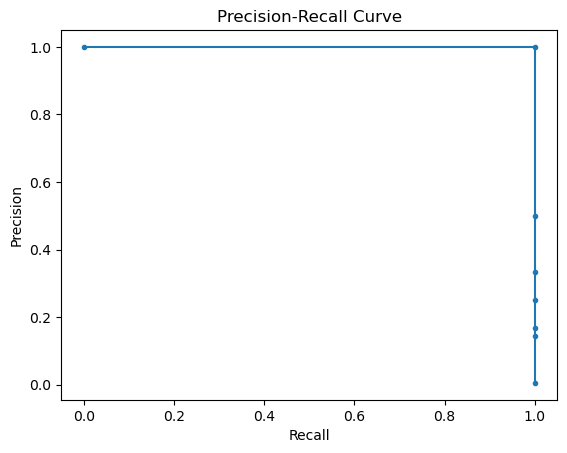

Random Forest Accuracy: 0.9951
Random Forest Precision: 0.0000
Random Forest Recall: 0.0000
Random Forest F1 Score: 0.0000


In [118]:
# Calculate AUC-ROC and Precision-Recall Curves

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score

# Train the RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Get predicted probabilities for the test set
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
print(f"ROC AUC Score for Random Forest: {roc_auc}")

# Compute the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_rf)

# Plot Precision-Recall curve (optional but helpful for visualization)
import matplotlib.pyplot as plt

plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Predict the class labels for test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance using your custom evaluation function or manually
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, zero_division=0)
recall = recall_score(y_test, y_pred_rf, zero_division=0)
f1 = f1_score(y_test, y_pred_rf, zero_division=0)

print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Random Forest Precision: {precision:.4f}")
print(f"Random Forest Recall: {recall:.4f}")
print(f"Random Forest F1 Score: {f1:.4f}")

In [120]:
# Adjust Deciion Threshold

# Get predicted probabilities for the test set
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Adjust the decision threshold (e.g., setting the threshold to 0.3 instead of 0.5)
threshold = 0.3
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluate using the adjusted predictions
evaluate_model(rf_model, X_test, y_pred_adjusted)

(1.0, 0.0, 0.0, 0.0)

In [122]:
# Evaluate the model using the previously defined function

# Evaluate the model after resampling, cross-validation, or threshold adjustment
accuracy, precision, recall, f1 = evaluate_model(gb_model, X_test, y_test)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [ ]:
# WE now must choose the best model based on these evaluation metrics

In [124]:
# Evaluate the models using different metrics

log_f1 = f1_score(y_test, log_model.predict(X_test), zero_division=0)
log_accuracy = accuracy_score(y_test, log_model.predict(X_test))

rf_f1 = f1_score(y_test, rf_model.predict(X_test), zero_division=0)
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

gb_f1 = f1_score(y_test, gb_model.predict(X_test), zero_division=0)
gb_accuracy = accuracy_score(y_test, gb_model.predict(X_test))

# Choose the best model based on accuracy

model_performance = {
    'Logistic Regression': log_accuracy,
    'Random Forest': rf_accuracy,
    'Gradient Boosting': gb_accuracy
}

best_model_name = max(model_performance, key=model_performance.get)
print(f"\nBest model based on Accuracy: {best_model_name}")


Best model based on Accuracy: Gradient Boosting


In [126]:
# Now let's save the best model for future use

import joblib

if best_model_name == 'Logistic Regression':
    best_model = log_model
elif best_model_name == 'Random Forest':
    best_model = rf_model
else:
    best_model = gb_model

In [128]:
# Save the best model
joblib.dump(best_model, 'best_model.pkl')

print("\nBest model saved as 'best_model.pkl'")


Best model saved as 'best_model.pkl'
